### the fundamental problem of linear algebra

to solve a system of linear equations



#### the nice case

n linear equations, n unknowns (equal number of equations and unknowns)



#### row picture

$
\begin{align}
2x - y = 0\\
-x + 2y = 3
\\
\\
\begin{bmatrix}
2 & -1 \\
-1 & 2
\end{bmatrix} 
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
0 \\
3
\end{bmatrix}
\\
\\
A \ X = b
\end{align}
$



In [6]:
# plot this linear system using the row picture (the column 
# picture has its own geometric representation, see below)

import pylinearalgebra.vistools as vist
import numpy as np

%matplotlib inline

f1 = lambda x: 2 * x
f2 = lambda x: x / 2 + 1.5

x = np.linspace(-10, 10, 100)

xy = vist.XY(x_lim=(-4, 4), y_lim=(-4, 4))
xy.fx(x, f1, color='r')
xy.fx(x, f2, color='b')

# solving the linear system using the row picture means to
# find the intersection between these two geometric representations
# (lines)

#### the column picture

$\begin{align}
x\begin{bmatrix}2 \\ -1\end{bmatrix}
+ 
y\begin{bmatrix}-1 \\ 2\end{bmatrix}
= \begin{bmatrix}0 \\ 3\end{bmatrix}
\end{align}$

it asks us to combine these two parts with the right **linear 
combination** to get the RHS

linear combination of the columns


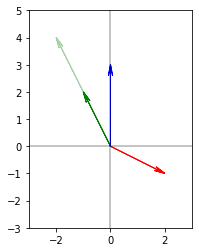

In [8]:
# plot again using the column picture
# we have the column vectors as the geometric representation of
# this system

# Parallelogram

import pylinearalgebra.vistools as vist
xy = vist.XY(x_lim=(-3, 3), y_lim=(-3, 5), names=list('rgbgcy'))
xy.vector((0, 0), (2, -1), shaft_arrow=False)
xy.vector((0, 0), (-1, 2), shaft_arrow=False)
xy.vector((0, 0), (0, 3), shaft_arrow=False)
xy.vector((0, 0), (-2, 4), shaft_arrow=False, alpha=0.35)

# question: what linear combination of the green and red vectors
# produces the blue vector?

# 1 * red + 2 * green 


### the matrix picture

$
\begin{bmatrix}
2 & 1 \\
1 & -2 
\end{bmatrix}
\begin{bmatrix}x \\ y\end{bmatrix} 
= \begin{bmatrix}3 \\ -1 \end{bmatrix}
$

borrowing the method to solve a scalar equation 

$ax = b, x = \frac{b}{a} = a^{-1}b$

we have:

$x = bA^{-1}$

#### linear combination

what are ALL the combinations? (regardless of RHS)

they will fill the whole plane



#### move on to 3 x 3 

$\begin{align}
2x - y = 0 \\
-x + 2y - z = -1 \\
-3y + 4z = 4
\\
\\
A = \begin{bmatrix}
2 & -1 & 0 \\ 
-1 & 2 & -1 \\ 
0 & -3 & 4\end{bmatrix}
\\
\\
b = \begin{bmatrix}0 \\ -1 \\ 4\end{bmatrix}
\end{align}$



Text(0.5, 0, '$Z$')

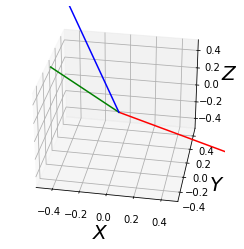

In [3]:
# plot with the row picture
# to find the position of the linear combination
# one has to find the point where three planes meet
# it's hard to visualize

# source:
# https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

f1 = np.array([[0, 0, 0], [2, -1, 0]])
ax.plot(f1[:, 0], f1[:, 1], f1[:, 2], color='r')

f2 = np.array([[0, 0, 0], [-1, 2, -1]])
ax.plot(f2[:, 0], f2[:, 1], f2[:, 2], color='g')

f3 = np.array([[0, 0, 0], [0, -3, 4]])
ax.plot(f3[:, 0], f3[:, 1], f3[:, 2], color='b')

ax.view_init(elev=ax.elev, azim=-80)
ax.set_xlim3d(-0.5, 0.5)
ax.set_ylim3d(-0.5, 0.5)
ax.set_zlim3d(-0.5, 0.5)
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)

Text(0.5, 0, '$Z$')

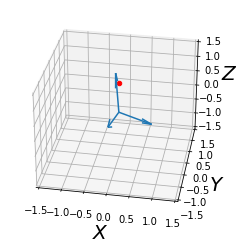

In [4]:
# plot with column picture

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

soa = np.array([
    [0, 0, 0, 2, -1, 0], [0, 0, 0, -1, 2, -3], [0, 0, 0, 0, -1, 4]
])
X, Y, Z, U, V, W = zip(*soa)

ax.quiver(X, Y, Z, U, V, W, length=0.4)

ax.scatter([0], [0], [1], color='r')

ax.view_init(elev=ax.elev, azim=-80)
ax.set_xlim3d(-1.5, 1.5)
ax.set_ylim3d(-1.5, 1.5)
ax.set_zlim3d(-1.5, 1.5)
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)



can we solve Ax = b for all b?

-> do the linear combinations fill 3-D space?

if these 3 column vectors lay in the same plane, we can not fill
the 3-D space (as all of them lay in the same plane)



# Recitation and Exercises

In [1]:
# solving problem 1.1
# 
#  find a combination x1w1 + x2w2 + x3w3 that gives {Z}
# this is to solve Ax = [w1, w2, w3]x = 0
# 

import pylinearalgebra.mattools as mt
A = [
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
]


print(mt.solve_rn(A))

[[1, -2, 1, 0]]


In [4]:
# solving problem 1.2

# multiply A by w
# using the column picture: the result is the linear
# combination of all the columns of A

import pylinearalgebra.mattools as mt
A = [
    [1, 2, 0],
    [2, 0, 3],
    [4, 1, 1]
]  # 33
w = [3, -2, 1]  # 31
Aw = [sum([elem * x for elem in row]) for row, x in zip(A, w)]
mt.pprint(Aw)  

⎡   9⎤
⎢ -10⎥
⎣   6⎦


In [ ]:
# solving problem 1.3

# the statement is correct